[View in Colaboratory](https://colab.research.google.com/github/rushi0109/14July2018Hackathon/blob/master/hotstar_1.ipynb)

In [67]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/machine-learning-indiahacks-2017/5f828822-4--4-hotstar_dataset.zip
!unzip 5f828822-4--4-hotstar_dataset.zip

--2018-08-26 09:09:48--  https://he-s3.s3.amazonaws.com/media/hackathon/machine-learning-indiahacks-2017/5f828822-4--4-hotstar_dataset.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.40.140
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.40.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51766669 (49M) [application/zip]
Saving to: ‘5f828822-4--4-hotstar_dataset.zip.1’

5f828822-4--4-hotst 100%[===================>]  49.37M  9.25MB/s    in 14s     

2018-08-26 09:10:02 (3.62 MB/s) - ‘5f828822-4--4-hotstar_dataset.zip.1’ saved [51766669/51766669]

Archive:  5f828822-4--4-hotstar_dataset.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [0]:
import numpy as np
import pandas as pd
import re
train_data = pd.read_json('train_data.json',orient='index')

In [0]:
train_data['g1'] = [re.sub(pattern='\:\d+',repl='',string=x) for x in train_data['genres']]
train_data['g1'] = train_data['g1'].apply(lambda x: x.split(','))
t1 = pd.Series(train_data['g1']).apply(frozenset).to_frame(name='t_genre')
genreSet = frozenset.union(*t1.t_genre)

In [0]:
def string_genres_time(genre, string):
 if genre in string:
   prbmStr = string[string.index(genre) :]
   #print(prbmStr)
   problemStr = prbmStr[prbmStr.index(':')+1:]
   #print(problemStr)
   #print(problemStr.index(','))
   if ',' in problemStr:
     return int(problemStr[0:problemStr.index(',')])
   else:
     return int(problemStr[0:])
 else:
   return 0

In [0]:
def string_dow_time(genre, string):
 if genre in string:
   prbmStr = string[string.index(genre) :]
   #print(prbmStr)
   problemStr = prbmStr[prbmStr.index(':')+1:]
   #print(problemStr)
   #print(problemStr.index(','))
   if ',' in problemStr:
     return int(problemStr[0:problemStr.index(',')])
   else:
     return int(problemStr[0:])
 else:
   return 0

In [0]:
def string_tod_time(genre, string):
	if genre in string:
		prbmStr = string[string.index(genre) :]
		#print(prbmStr)
		problemStr = prbmStr[prbmStr.index(':')+1:]
		#print(problemStr)
		#print(problemStr.index(','))
		if ',' in problemStr:
			return int(problemStr[0:problemStr.index(',')])
		else:
			return int(problemStr[0:])
	else:
		todData = genre[1:]
		if todData in string:
			if string.index(todData) == 0:
				prbmStr = string[string.index(todData) :]
				#print(prbmStr)
				problemStr = prbmStr[prbmStr.index(':')+1:]
				#print(problemStr)
				#print(problemStr.index(','))
				if ',' in problemStr:
					return int(problemStr[0:problemStr.index(',')])
				else:
					return int(problemStr[0:])
			else:
				return 0
		else:
			return 0

In [0]:
for i in genreSet:
  train_data[i] = train_data["genres"].apply(lambda x : string_genres_time(i, x))

In [0]:
for i in np.arange(1,8):
  str_i = str(i) + ':'
  train_data[i] = train_data["dow"].apply(lambda x : string_dow_time(str_i, x))

In [0]:
for i in np.arange(0,24):
  str_i = ','+str(i)+':'
  colName = 'tod_'+str(i)
  train_data[colName] = train_data["tod"].apply(lambda x : string_genres_time(str_i, x))

In [76]:
train_data.head().T

,train-1,train-10,train-100,train-1000,train-10000
cities,"gurgaon:55494,delhi:31892","delhi:5862,nagar:8916,mumbai:1593",navi mumbai:4142,"new delhi:4131,chennai:2878,navi mumbai:1339","gurgaon:6077,chennai:4055"
dow,"1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10",3:4142,"1:658,3:5867,5:413,4:1339,7:71","1:1641,2:480,4:1445,7:1663,6:4900"
genres,"Cricket:82379,Kabaddi:255,Reality:4751","Cricket:15640,Wildlife:730","LiveTV:13,Football:4129","TalkShow:658,Cricket:7690","Drama:5503,Cricket:3283,Reality:1345"
segment,neg,neg,neg,neg,neg
titles,"Top Raids: Haryana vs Services SCB:103,Day 4: ...","Dhoni Quits Captaincy:148,Day 4: India Move in...","Star Sports 4:13,Manchester United vs Everton:...","SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,..."
tod,"10:26,13:331,12:323,20:21864,21:16233,17:7953,...","11:1661,10:384,20:401,21:798,22:221,16:525,19:...","1:1207,0:2406,2:529","11:71,20:2417,21:1042,23:2288,19:1872,8:658","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23..."
g1,"[Cricket, Kabaddi, Reality]","[Cricket, Wildlife]","[LiveTV, Football]","[TalkShow, Cricket]","[Drama, Cricket, Reality]"
Football,0,0,4129,0,0
Romance,0,0,0,0,0
Reality,4751,0,0,0,1345


In [0]:
train_data.drop(['g1','tod','dow','genres'],inplace=True,axis=1)

In [0]:
train_data_backup = train_data.copy()

In [0]:
train_data.drop(['titles','cities'],inplace=True,axis=1)

In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train-1 to train-99999
Data columns (total 67 columns):
segment         200000 non-null object
Football        200000 non-null int64
Romance         200000 non-null int64
Reality         200000 non-null int64
Crime           200000 non-null int64
Action          200000 non-null int64
Badminton       200000 non-null int64
Cricket         200000 non-null int64
Sport           200000 non-null int64
Kids            200000 non-null int64
Wildlife        200000 non-null int64
Documentary     200000 non-null int64
Volleyball      200000 non-null int64
Science         200000 non-null int64
FormulaE        200000 non-null int64
Mythology       200000 non-null int64
NA              200000 non-null int64
IndiaVsSa       200000 non-null int64
Family          200000 non-null int64
Hockey          200000 non-null int64
Teen            200000 non-null int64
Formula1        200000 non-null int64
Boxing          200000 non-null int64
Awards  

In [81]:
train_data.segment.unique()

array(['neg', 'pos'], dtype=object)

In [0]:
train_data.segment.replace('neg',0,inplace=True)

In [0]:
train_data.segment.replace('pos',1,inplace=True)

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train-1 to train-99999
Data columns (total 67 columns):
segment         200000 non-null int64
Football        200000 non-null int64
Romance         200000 non-null int64
Reality         200000 non-null int64
Crime           200000 non-null int64
Action          200000 non-null int64
Badminton       200000 non-null int64
Cricket         200000 non-null int64
Sport           200000 non-null int64
Kids            200000 non-null int64
Wildlife        200000 non-null int64
Documentary     200000 non-null int64
Volleyball      200000 non-null int64
Science         200000 non-null int64
FormulaE        200000 non-null int64
Mythology       200000 non-null int64
NA              200000 non-null int64
IndiaVsSa       200000 non-null int64
Family          200000 non-null int64
Hockey          200000 non-null int64
Teen            200000 non-null int64
Formula1        200000 non-null int64
Boxing          200000 non-null int64
Awards   

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_data_count = train_data.copy()

In [0]:
train_data_count[train_data_count !=0 ] = 1

In [0]:
train_data_count['genre_counts'] = train_data_count[list(genreSet)].sum(axis=1)

In [89]:
train_data_count['genre_counts'].value_counts()

2     56332
3     39742
1     33047
4     26489
5     17220
6     11085
7      6883
8      4110
9      2290
10     1350
11      724
12      350
13      195
14      102
15       48
16       22
17        7
19        2
18        1
22        1
Name: genre_counts, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


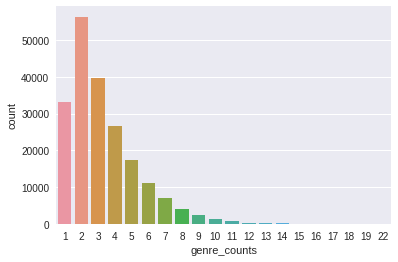

In [90]:
sns.countplot(train_data_count['genre_counts'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


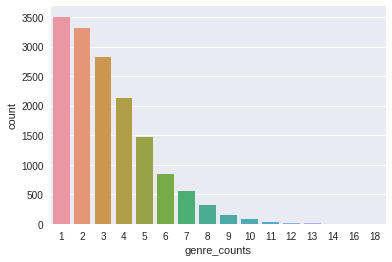

In [91]:
sns.countplot(train_data_count['genre_counts'][train_data_count['segment'] == 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


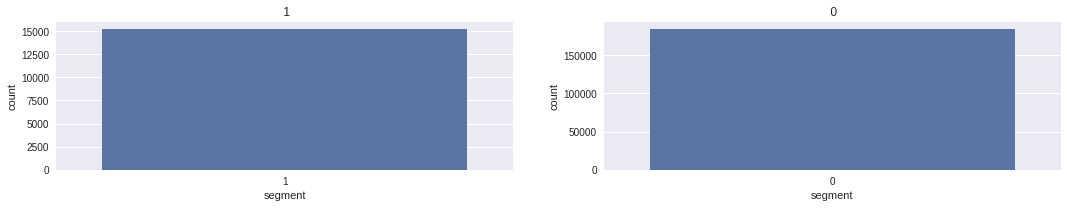

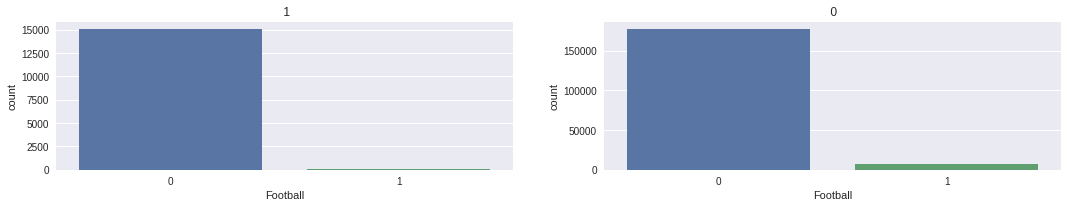

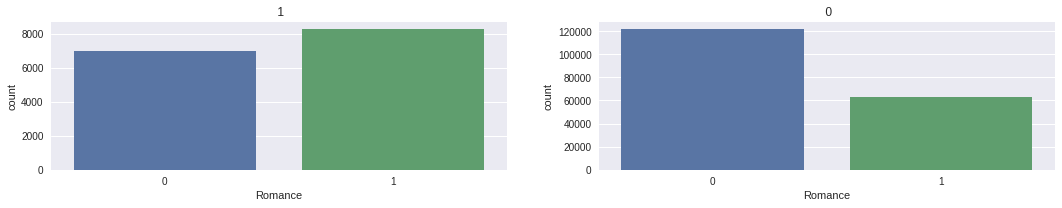

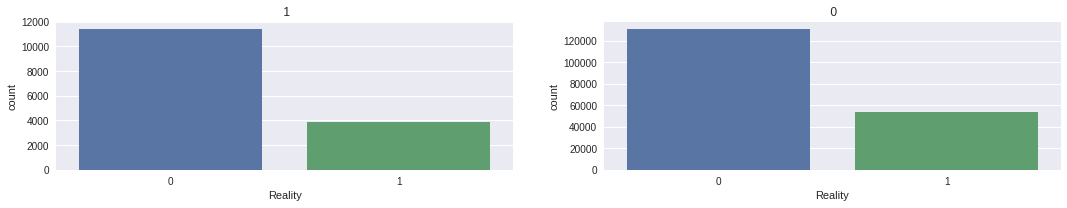

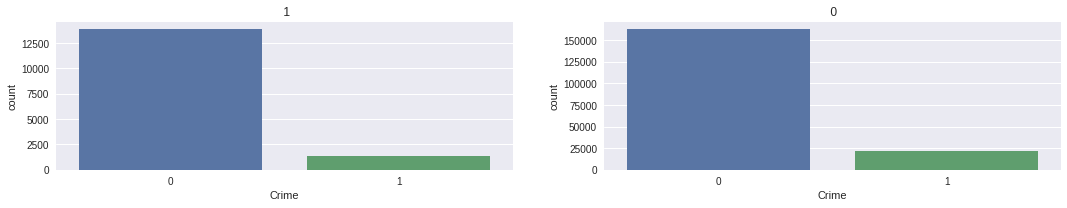

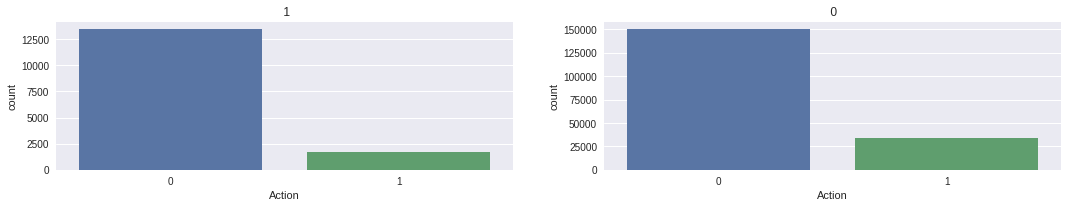

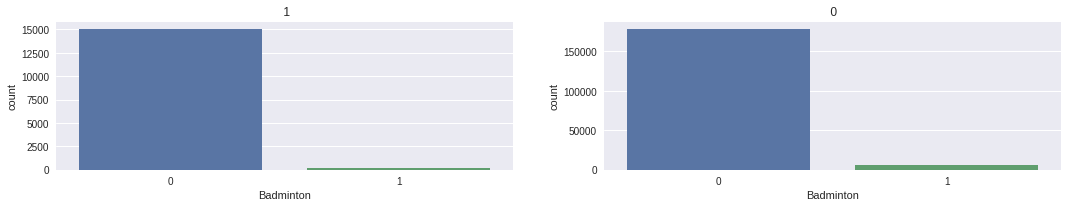

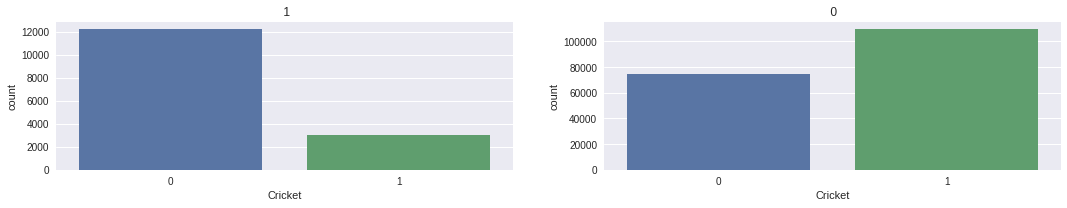

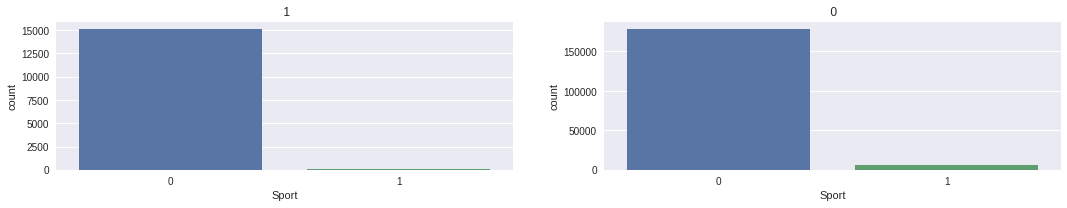

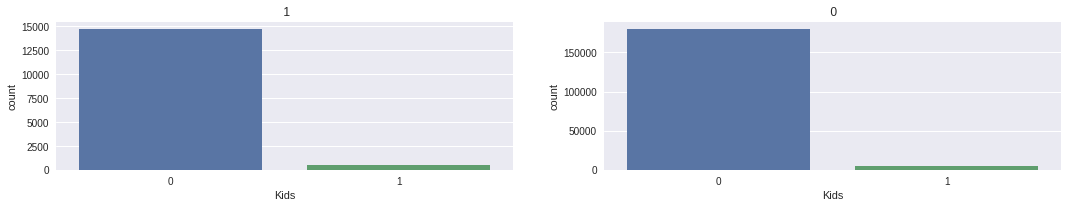

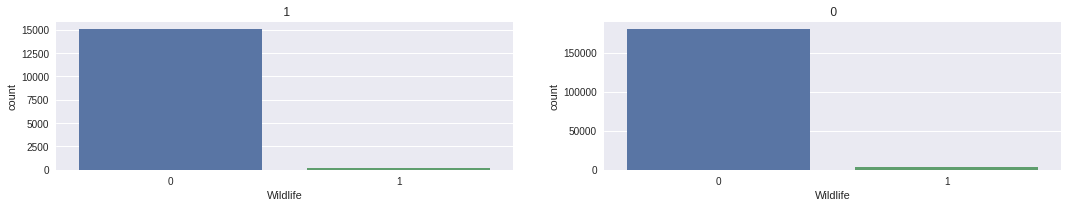

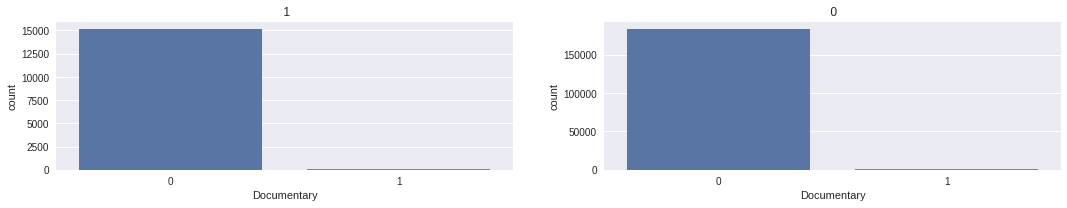

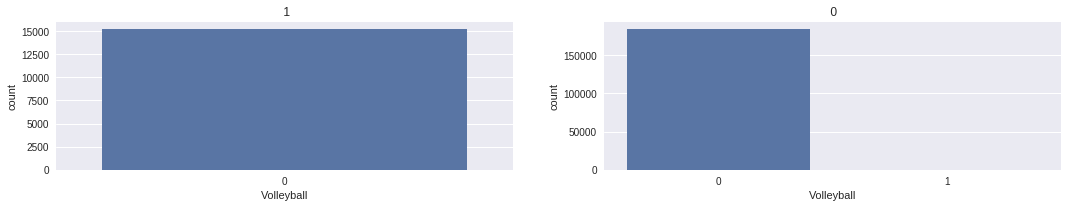

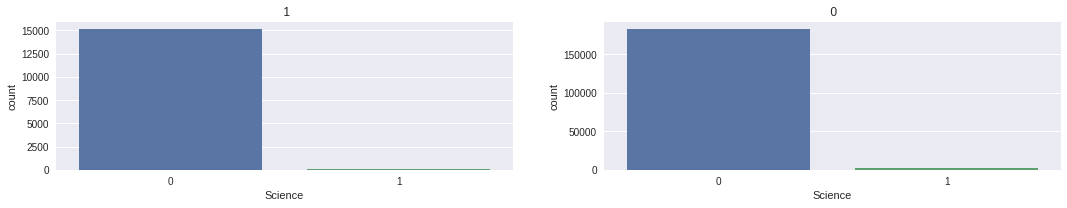

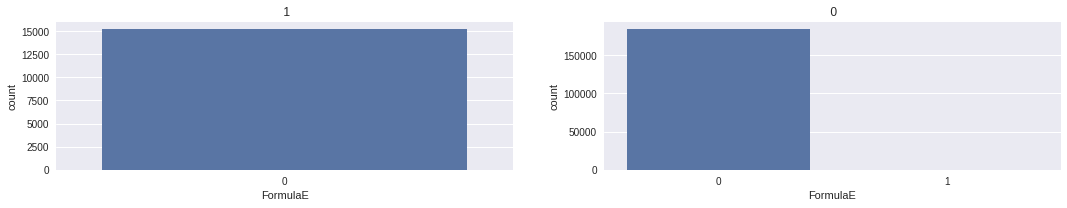

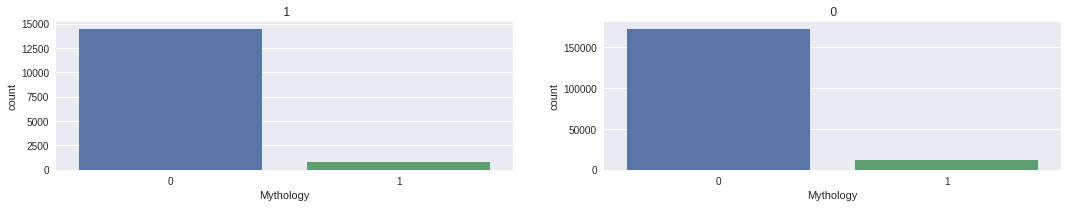

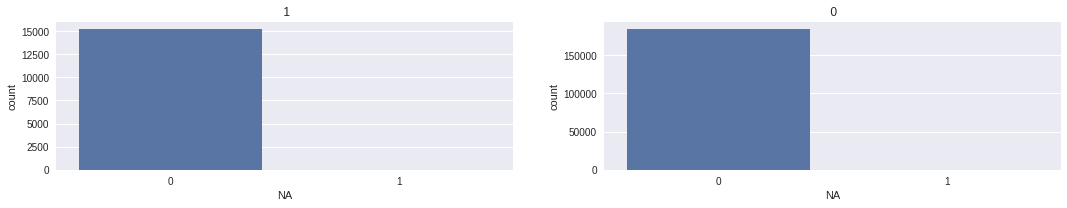

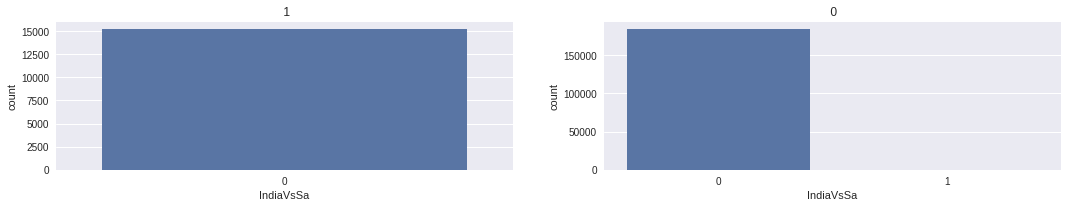

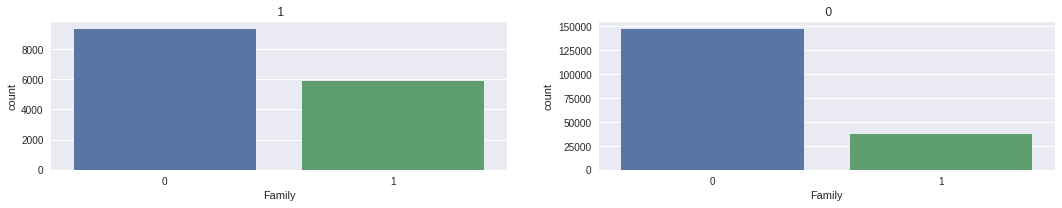

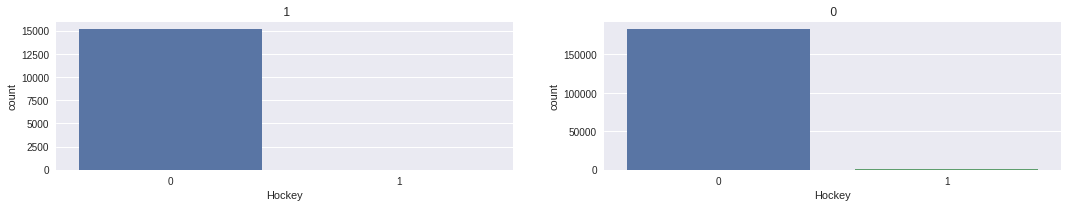

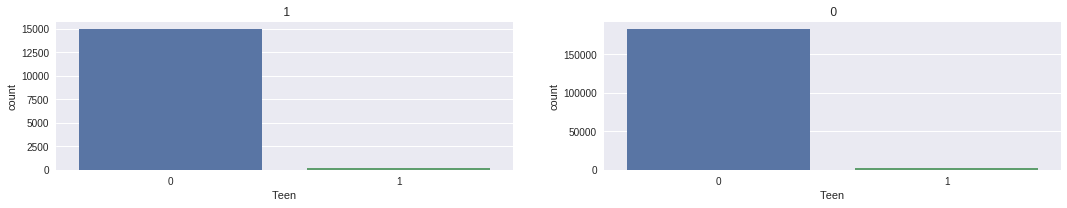

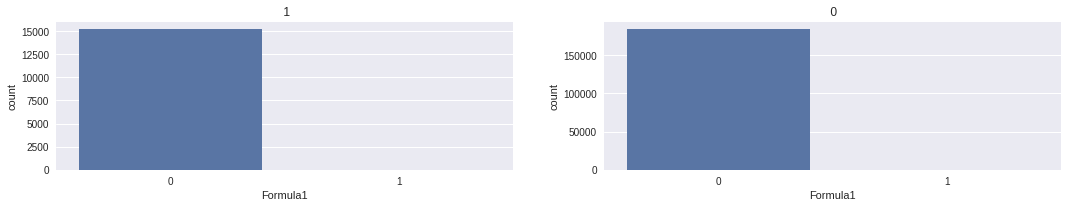

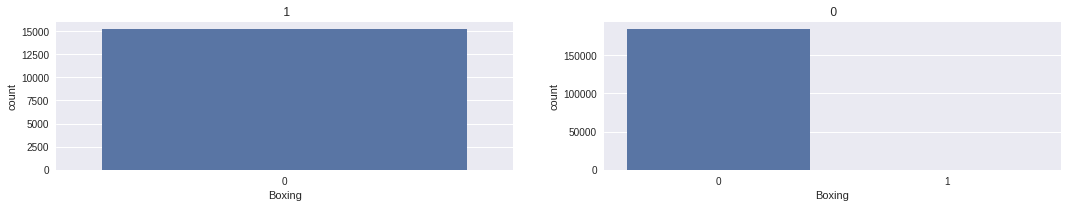

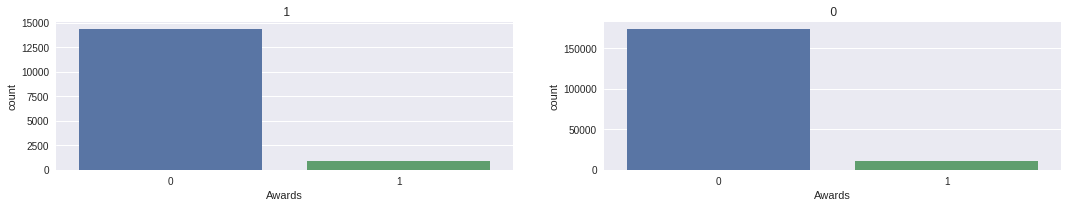

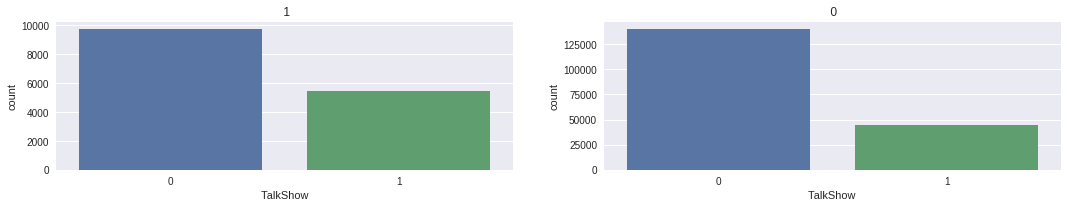

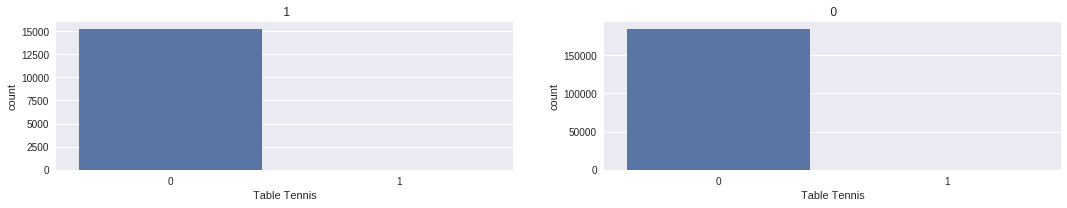

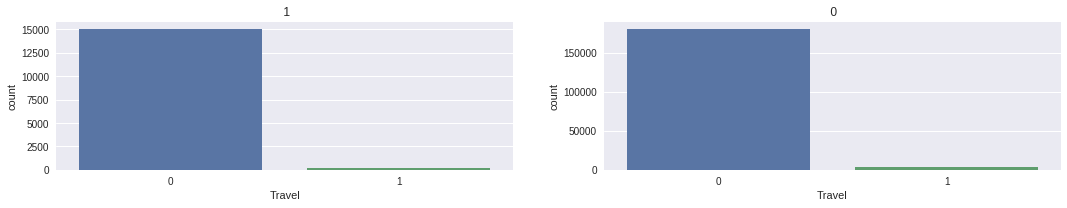

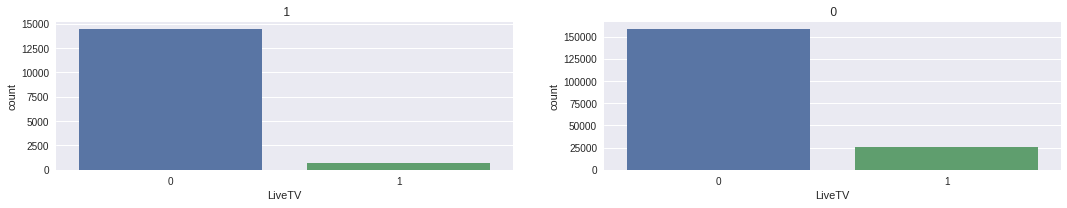

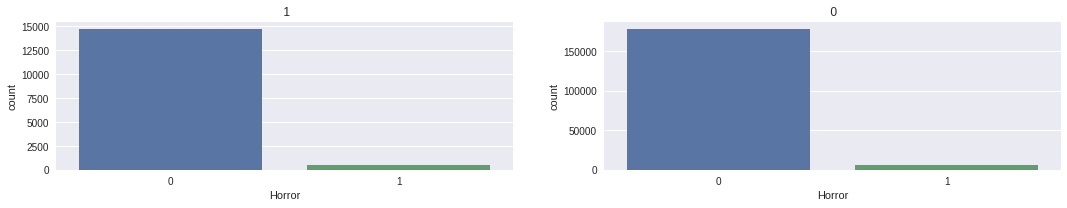

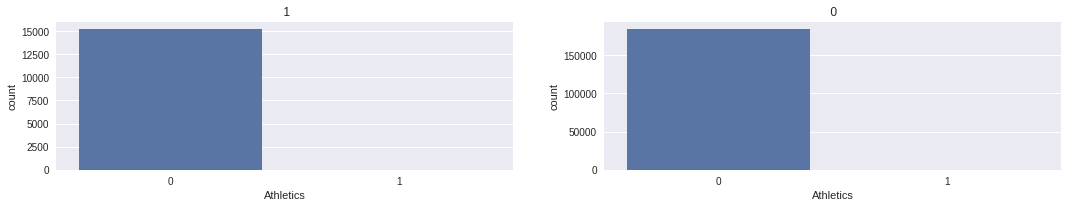

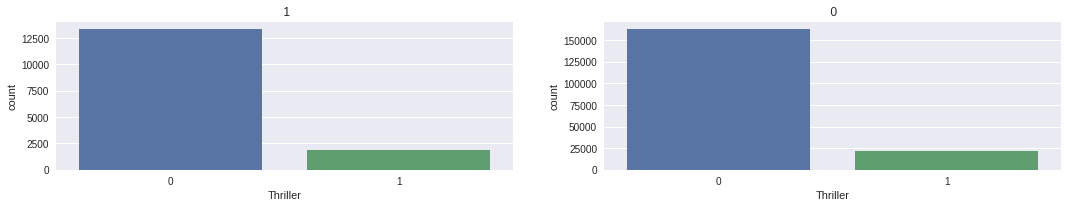

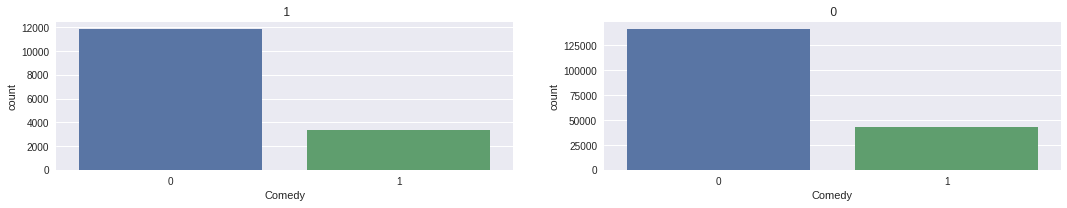

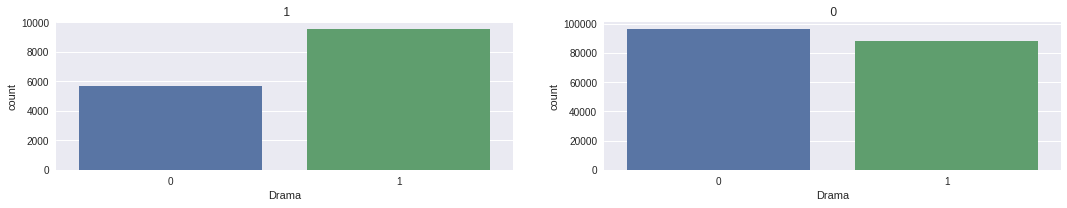

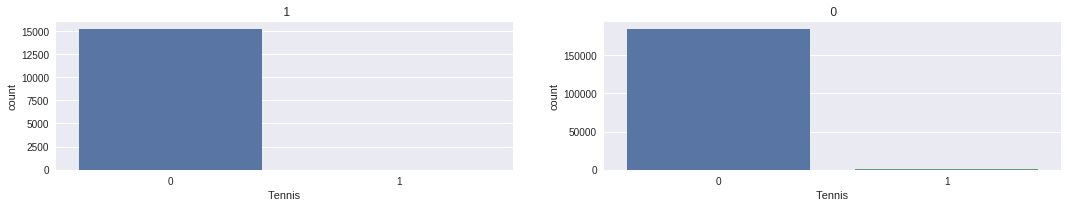

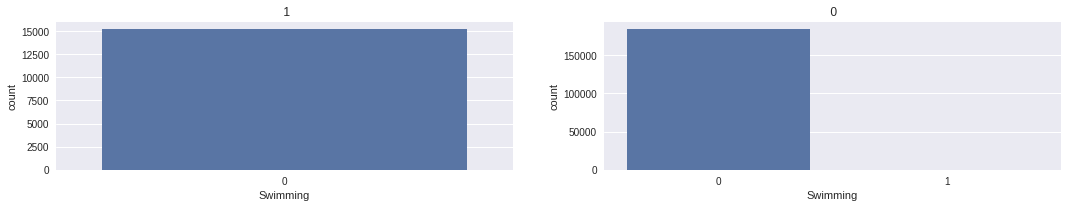

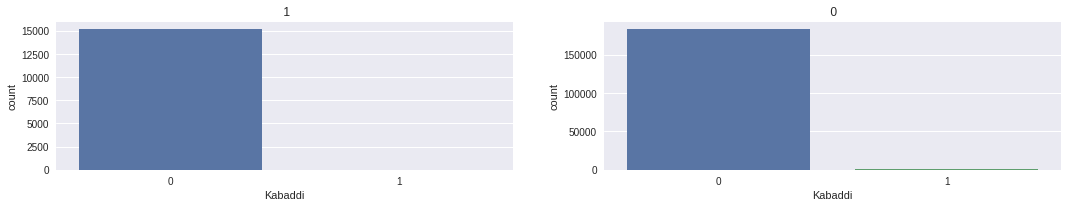

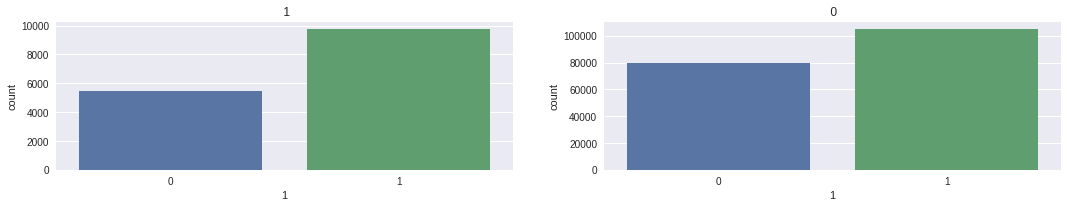

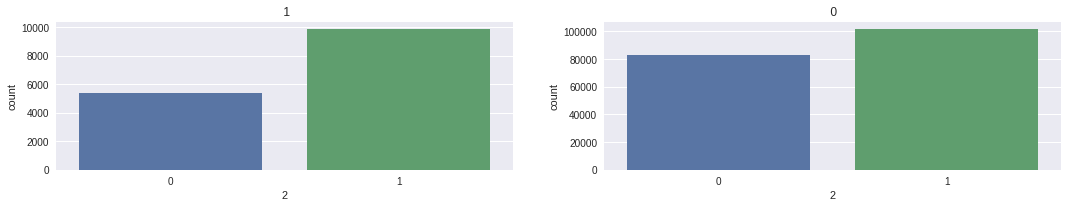

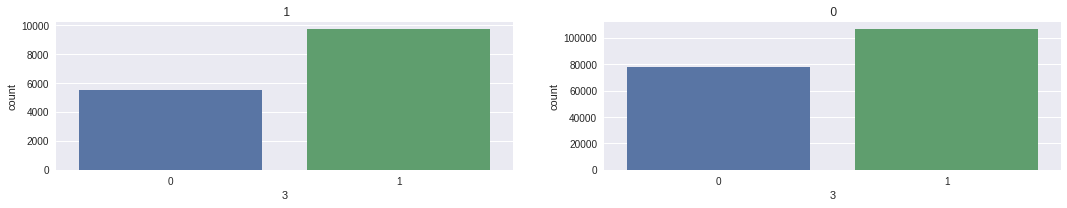

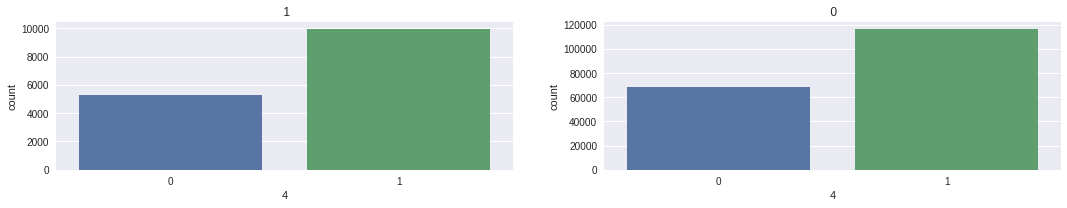

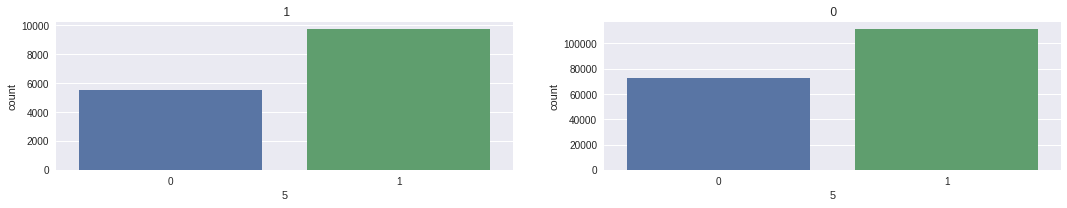

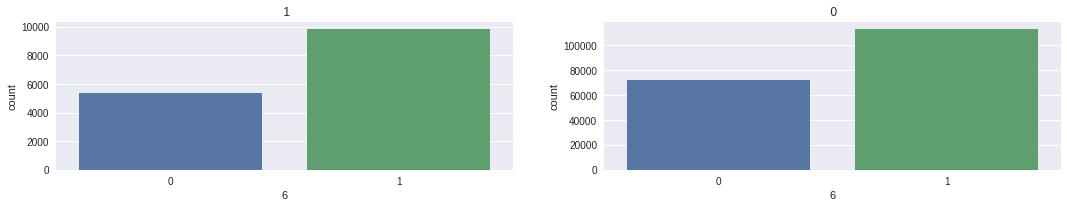

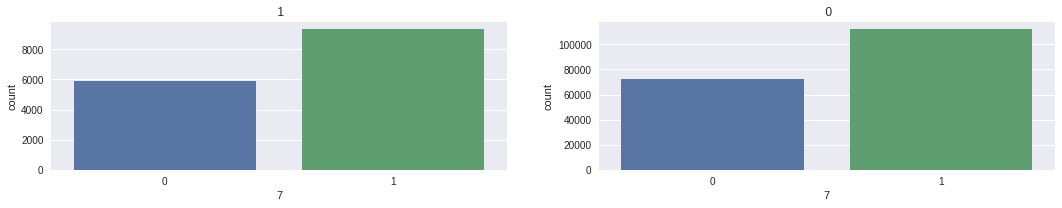

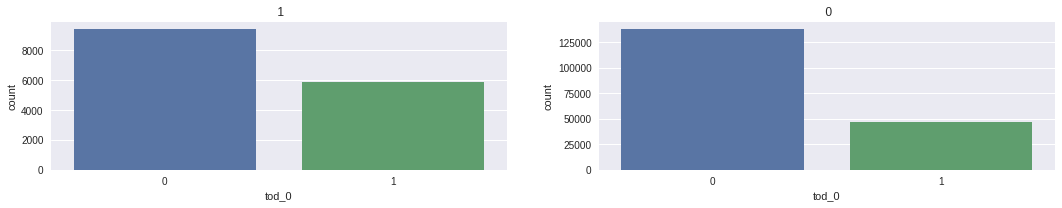

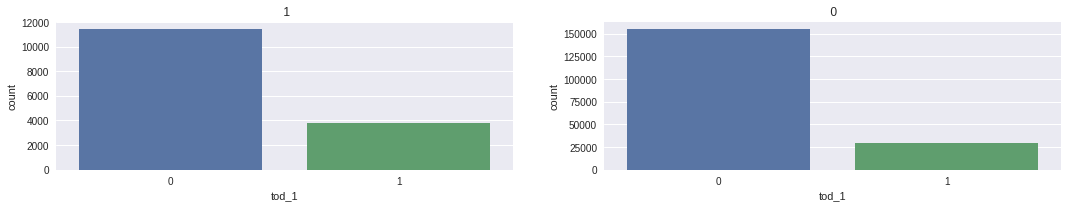

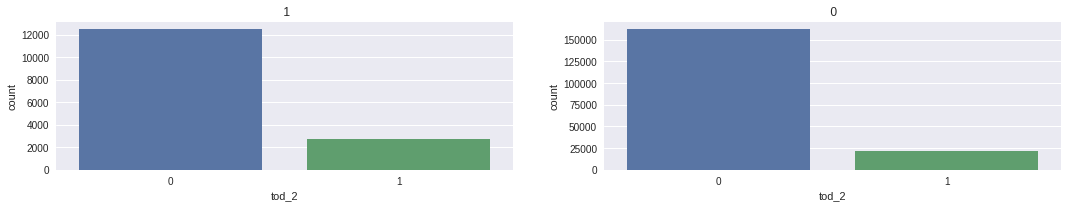

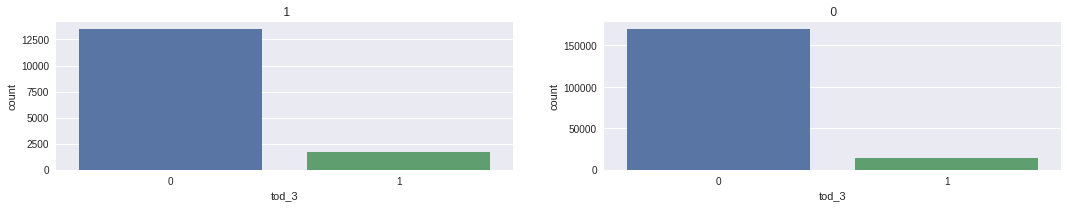

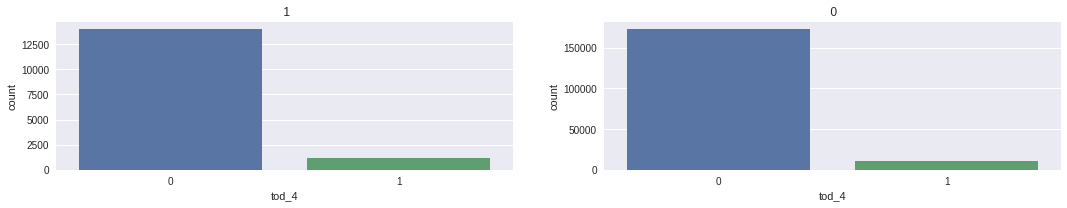

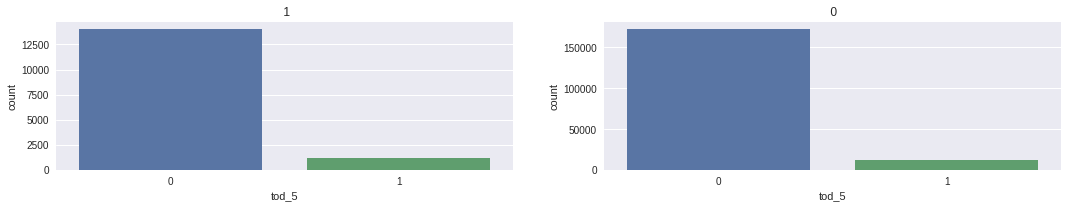

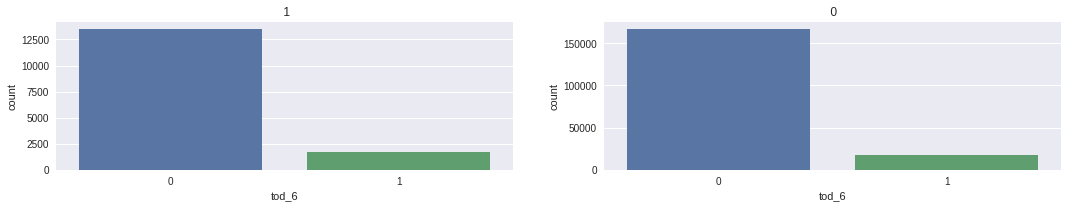

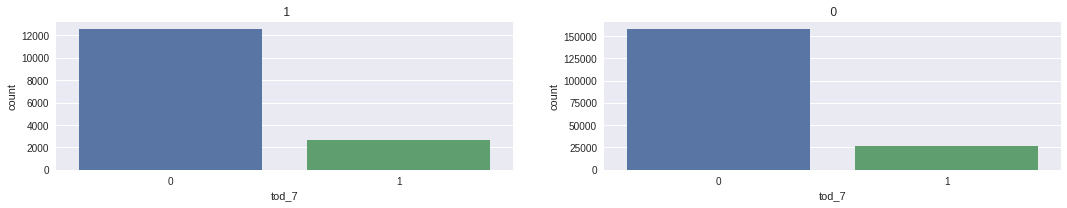

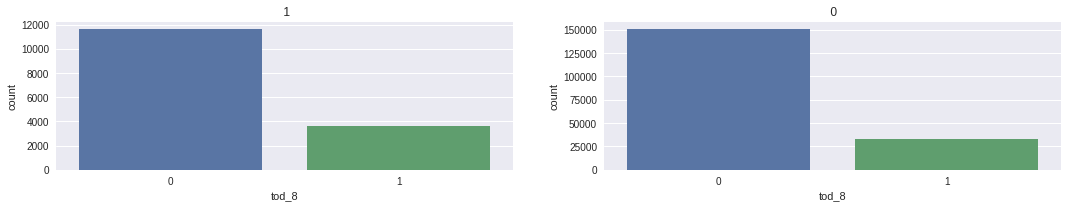

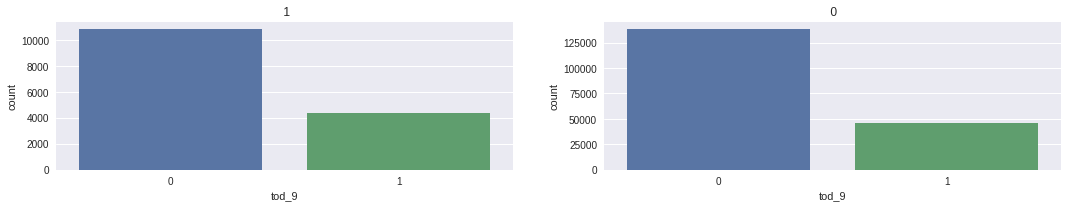

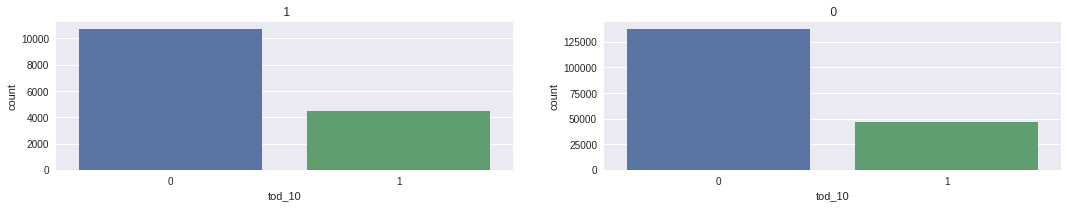

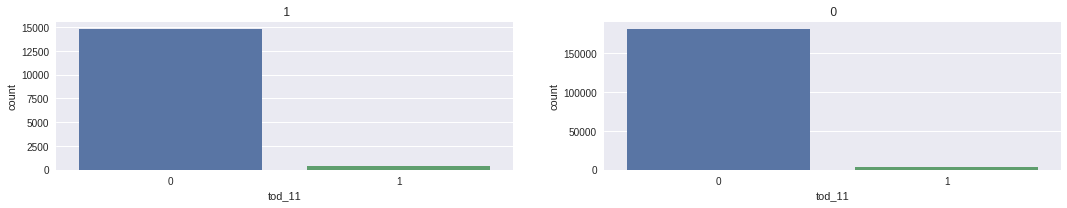

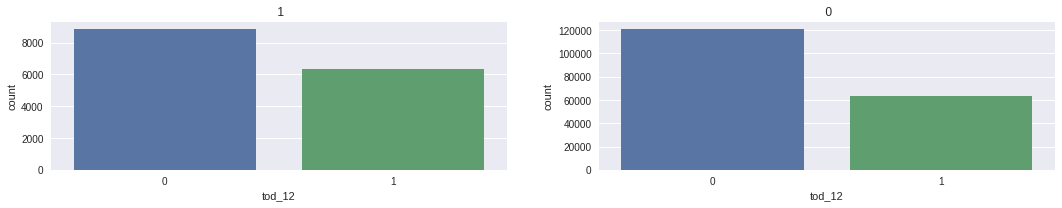

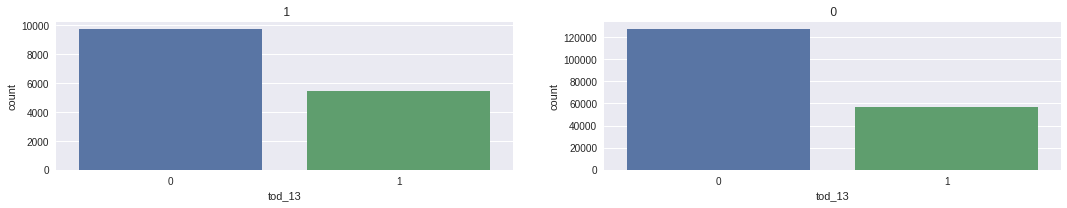

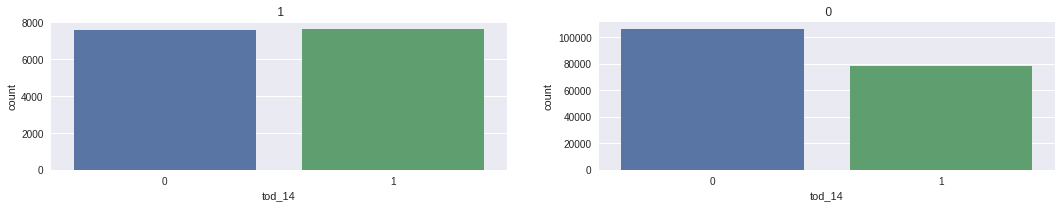

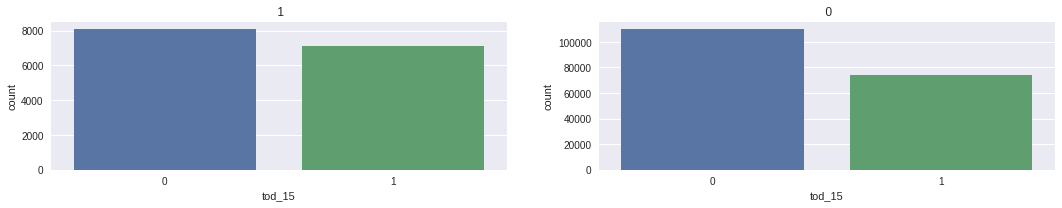

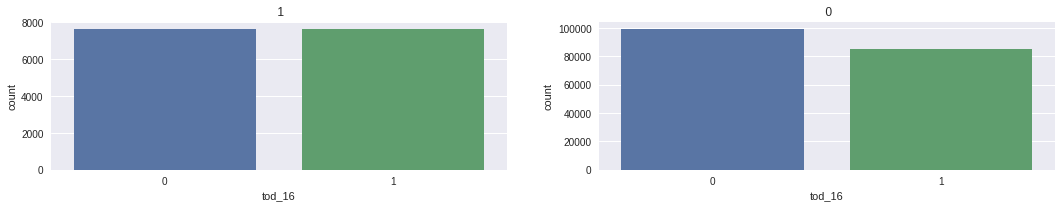

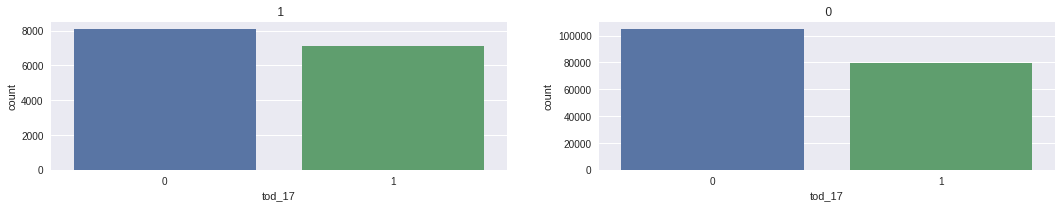

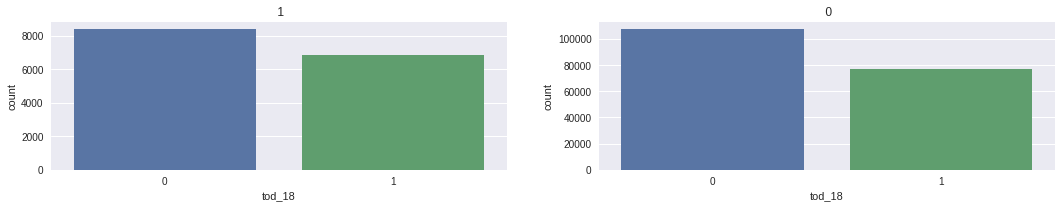

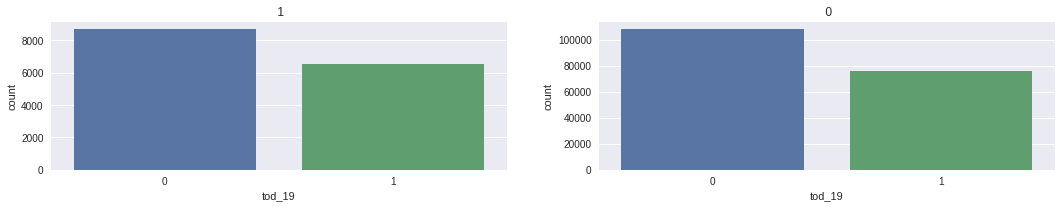

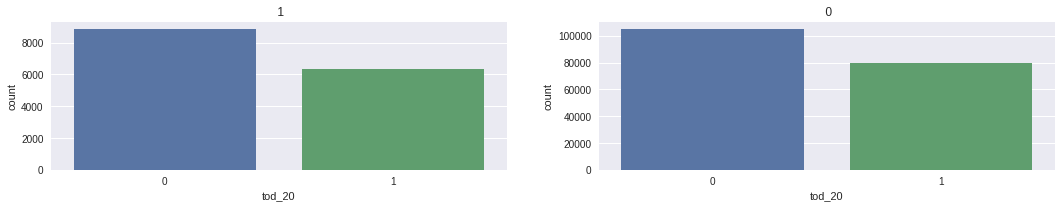

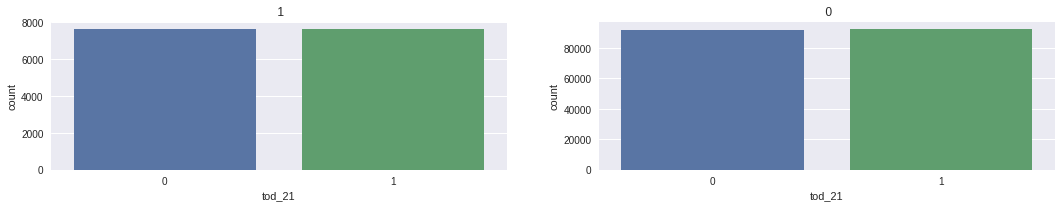

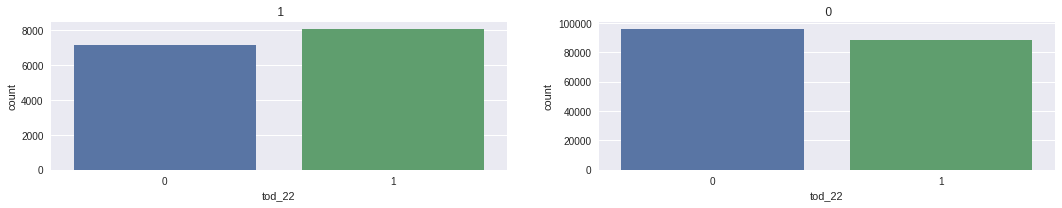

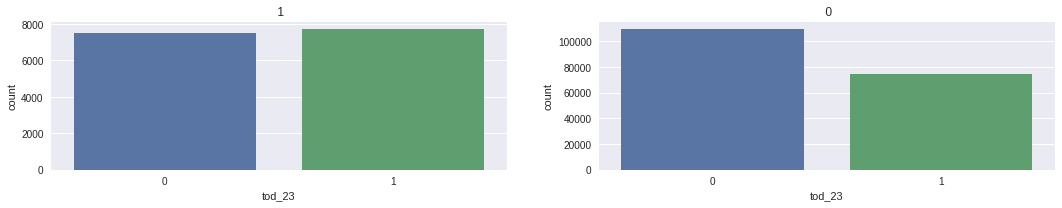

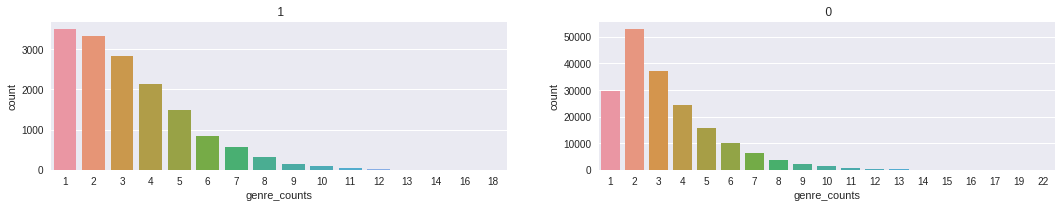

In [157]:
for col in train_data_count.columns:
  plt.figure(1,figsize=(18,6))  
  plt.subplot(221)
  plt.title(' 1')
  sns.countplot(train_data_count[col][train_data_count['segment'] == 1])
  plt.subplot(222)
  plt.title(' 0')
  sns.countplot(train_data_count[col][train_data_count['segment'] == 0])
  #plt.subplot(233)
  #plt.title('Box Plot')
  #sns.boxplot(x = train_data.segment,y=train_data[col]/100000) 
  plt.show()

In [0]:
#for col in train_data_count.columns:
#  sns.countplot(train_data_count[col][train_data_count['segment'] == 0])
#  plt.show()

In [0]:
  train_data['total_time_spent'] = train_data[list(genreSet)].sum(axis=1)

In [0]:
train_data['total_time_spent'] = train_data['total_time_spent']/3600 

In [112]:
train_data['total_time_spent'].astype(np.int,inplace = True)

train-1         24
train-10         4
train-100        1
train-1000       2
train-10000      2
train-100000    15
train-100001     2
train-100002     3
train-100003     0
train-100004     4
train-100005     1
train-100006     0
train-100007    39
train-100008     2
train-100009     0
train-10001      1
train-100010     1
train-100011     0
train-100012     9
train-100013     7
train-100014     5
train-100015    21
train-100016     0
train-100017     0
train-100018     0
train-100019     2
train-10002      0
train-100020    14
train-100021     1
train-100022     0
                ..
train-99972      0
train-99973      3
train-99974      5
train-99975      1
train-99976      5
train-99977     61
train-99978      0
train-99979      0
train-9998       0
train-99980     18
train-99981      7
train-99982      0
train-99983      1
train-99984      2
train-99985      1
train-99986      2
train-99987      4
train-99988      0
train-99989     11
train-9999       0
train-99990      3
train-99991 

In [113]:
train_data['total_time_spent'].describe()

count    200000.000000
mean          5.901987
std          12.822070
min           0.000278
25%           0.428611
50%           1.873056
75%           5.920347
max         556.647778
Name: total_time_spent, dtype: float64

In [0]:
#train_data['total_time_spent_except_Cricket'] = train_data['total_time_spent'] - train_data['Cricket']
genreList = list(genreSet)
genreList.remove('Cricket')

In [0]:
train_data['total_time_spent_except_Cricket'] = train_data[genreList].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


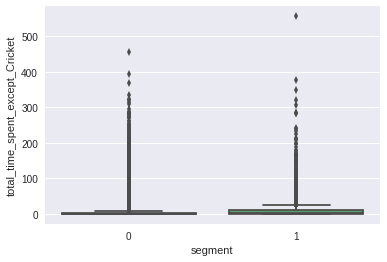

In [123]:
sns.boxplot(x=train_data['segment'],y=train_data['total_time_spent_except_Cricket']/3600)

In [0]:
sum_data = train_data_count.drop(['genre_counts','segment'],axis=1).sum(axis=0)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


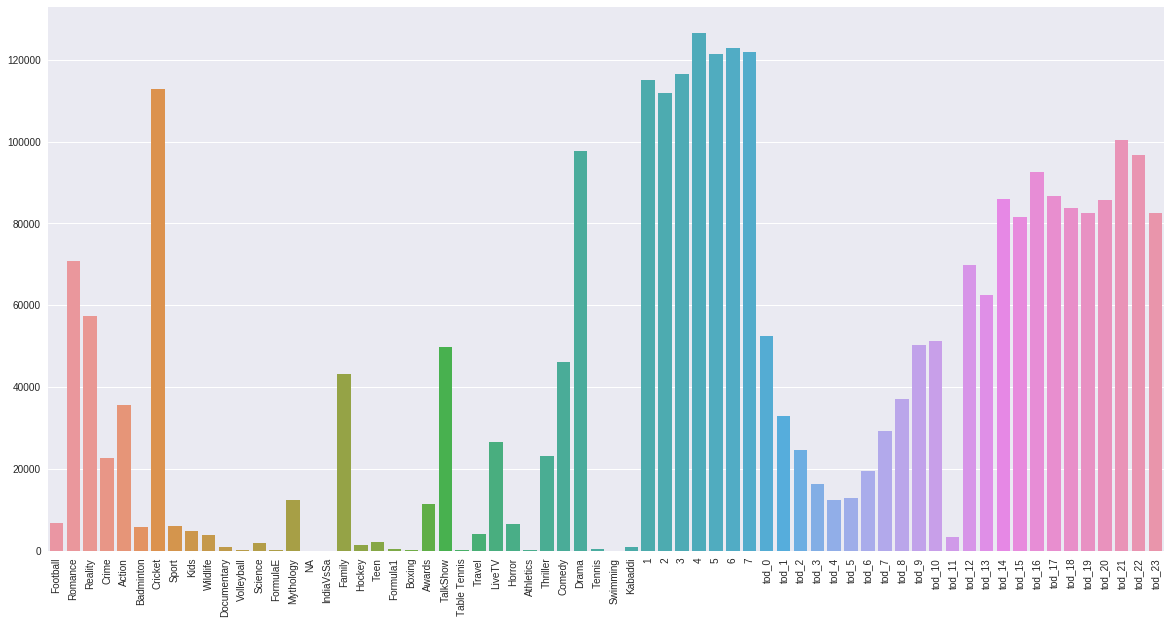

In [144]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(y = sum_data.values,x=sum_data.index)

From the above graphs, It is visible that
1. Cricket,Drama,Romance,Reality,TalkShow,Family,Comedy are one of the favorite Genres and people tend to watch them more. Where Cricket is the top watched genre.
2. People watch more on Hotstar on 4th day of a week and less on 2nd Day of a week.
3. People tend to watch more on Hotstar on second half of the day.
4. Segment point of view, 


1.   Romance, Drama , Family and Talkshow are more contributor for positive segment
2.   Hour 14,15,16,17,21,22,23 are more contributing for positive segment









In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [0]:
y_label = train_data_count.pop('segment')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_data_count, y_label, test_size=0.7, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
seed = 9

In [173]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train.iloc[train_index],X_train.iloc[test_index]
    ytr,yvl = y_train.iloc[train_index],y_train.iloc[test_index]
    
    #model
    lr = LogisticRegression()
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)   
    print('Test Accuracy: ',accuracy_score(yvl,lr.predict(xvl)))
    print('Train Accuracy: ',accuracy_score(ytr,lr.predict(xtr)))
    print('Confusion Matrix: ',confusion_matrix(yvl,lr.predict(xvl)))
    i+=1

1 of KFold 5
ROC AUC score: 0.5013127800185797
Test Accuracy:  0.9229230897425215
Train Accuracy:  0.923206733473614
Confusion Matrix:  [[11073     7]
 [  918     3]]
2 of KFold 5
ROC AUC score: 0.5018556681836177
Test Accuracy:  0.923006416131989
Train Accuracy:  0.9230400633346528
Confusion Matrix:  [[11073     7]
 [  917     4]]
3 of KFold 5
ROC AUC score: 0.5015835340681802
Test Accuracy:  0.9234166666666667
Train Accuracy:  0.9231041666666666
Confusion Matrix:  [[11078     1]
 [  918     3]]
4 of KFold 5
ROC AUC score: 0.5015872174933383
Test Accuracy:  0.9225768814067838
Train Accuracy:  0.923168267327764
Confusion Matrix:  [[11066    13]
 [  916     4]]
5 of KFold 5
ROC AUC score: 0.4997743478653308
Test Accuracy:  0.92291024252021
Train Accuracy:  0.9230432699318765
Confusion Matrix:  [[11074     5]
 [  920     0]]
